<img src="carro1.jpg"/>

<center> <h1 style="color:#0000CD">Analisis de Datos</h1> </center>
<center> <h5>Universidad Castro Carazo</h5>
<center> <h6>1C - 2013</h6> </center>
</br>

<p style="text-align:justify">Este notebook contiene el analisis de los datos de los vehiculos a la venta por parte de la empresa Pk2, esta empresa se encuentra interesada en responder una pregunta de negocio particular.Como se puede incrementar las ventas de autos de segunda mano?Para esto se realiza un analisis del conjunto de datos facilitado por la empresa a efectos de poder brindar conocimiento sobre las ditribuciones de sus lotes de venta, los autos con mayor precio, o caracteristicas de los autos, esto para dotar de insumos suficientes a la toma de desiciones<p>
    </br>
    <a href= "https://archive.ics.uci.edu/ml/datasets/Automobile">Fuente de datos para el proceso de analisis </a>

<h2 Style = "color:#98FB98">1. Cargar y estandarizar los set de datos</h2>
</br>
<p>Que hace en esta etapa?</p>
</br>
<li>1.importar las librerias de Python necesarias<li>
<li>2.importar el o los set de datos<li>
<li>3.Revisar los encabezados de los dataframes<li>
<li>4.Si solo si mas de un set de datos, los vamos a unir en uno solo<li>
</ol>
<h3 Style= "color:#DDA0DD">Importar las librerias de Python necesarias</h3>
       

In [1]:
import pandas as pd #Se utiliza para grandes volumenes de datos- Dataframe
import numpy as np #Se usa para el manejo de estructuras de datos: Tuplas, Listas,Diccionarios
import matplotlib.pyplot as plt# Permite crear graficos. 

In [2]:
import matplotlib as mpl
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

<h3 Style = "color:#e48826">1.2 ) Importar el o los set de datos</h3>

In [3]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
       "style", "wheels", "engine", "base", "length", "width", "heingt",
       "curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
       "compression", "horsepower", "peak", "City", "Higway", "price"]

df_1er_set = pd.read_csv("autos.csv",names=cols)
df_2do_set = pd.read_csv("Autos1.csv",names=cols)

In [4]:
df_1er_set.head(5) 

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df_1er_set.shape

(197, 26)

In [6]:
df_1er_set.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [7]:
df_1er_set.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
df_1er_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

<h2 style="color:#e48826"> 1.3. Revisar los encabezados de los Dataframe </h2>
<p> se motiva la estandarizacion de los nombres de las columnas, considerando lo siguiente
</p>

<ol>
    <li>Los nombres de las columnas no deben contener espacios en blanco</li>
    <li>Los nombres no deben empezar por numeros</li>
    <li>Si el nombre se conforma por 2 o mas palabras la letra inicial de cada palabra va en mayuscula</li>
    <li>No deben existir nombres repetidos</li>
</ol>

In [9]:
df_1er_set.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [10]:
df_2do_set.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [11]:
df_1er_set.rename({'engine-size': 'engineSize'}, axis=1, inplace=True)
df_2do_set.rename({'engine-size': 'engineSize'}, axis=1, inplace=True)

In [12]:
df_1er_set.head(2)


,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [13]:
df_2do_set.head(2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989


<h3 style="color:#e48826"> 1.4. Unir los set de Datos </h3>

In [14]:
unionArchivos = [df_1er_set, df_2do_set]
dfAutos = pd.concat(unionArchivos)
dfAutos.shape

(226, 26)

In [15]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<h2 Style = "color:#98FB98">1. Cargar y estandarizar los set de datos</h2>
</br>
<p>Que hace en esta etapa?</p>
</br>
<li>1. Identificar como se muestran los valores faltantes y estandarizarlos en NAN<li>
<li>2.Contar la cantidad de valores faltantes por variable<li>
<li>3.Analizar la imputacion de los valores numericos (con la media)<li>
<li>4.Analizar la imputacion de los valores categoricos (con valor mas frecuente)<li>
<li>5.Eliminar filas con valores faltantes <li>    
</ol>


<h3 Style= "color:#DDA0DD">1. Identificar como se muestran los valores faltantes </h3>

In [16]:
dfAutos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [17]:
dfAutos.replace("?",np.nan, inplace=True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3 Style= "color:#DDA0DD">2. Contar la cantidad de valores faltantes por variable </h3>

In [18]:
dfValoresFaltantes=dfAutos.isnull()
dfValoresFaltantes.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
for column in dfValoresFaltantes.columns.values.tolist():
    print(column)
    print(dfValoresFaltantes[column].value_counts())
    print("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engineSize
False    226
Name: engineSize, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       

<h3 style = "color:#DDA0DD">3. Analizar la imputacion de valores numericos </h3>

In [20]:
mean_value = dfAutos["normalized"].astype("float").mean (axis=0)
print("La media de normalized es: ", mean_value)

La media de normalized es:  122.28333333333333


In [21]:
mean_value = dfAutos["bore"].astype("float").mean (axis=0)
print("La media de bore es: ", mean_value)

La media de bore es:  3.3194594594594586


In [22]:
mean_value = dfAutos["stroke"].astype("float").mean (axis=0)
print("La media de stroke es: ", mean_value)

La media de stroke es:  3.2785135135135133


In [23]:
mean_value = dfAutos["horsepower"].astype("float").mean (axis=0)
print("La media de horseówer es: ", mean_value)

La media de horseówer es:  102.98214285714286


In [24]:
mean_value = dfAutos["peak"].astype("float").mean (axis=0)
print("La media de peak es: ", mean_value)

La media de peak es:  5100.892857142857


In [25]:
dfAutos["normalized"].replace(np.nan,122,inplace=True)
dfAutos["bore"].replace(np.nan,3.31,inplace=True)
dfAutos["stroke"].replace(np.nan,3.27,inplace=True)
dfAutos["horsepower"].replace(np.nan,102,inplace=True)
dfAutos["peak"].replace(np.nan,5100,inplace=True)
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<h3 style = "color:#DDA0DD"> 4.Analizar la imputacion de los valores categoricos (con valor mas frecuente) </h3>

In [26]:
dfAutos["doors"].value_counts().idxmax()

'four'

In [27]:
dfAutos["doors"].replace(np.nan,"four",inplace=True)
dfAutos.head(4)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


<h3 style = "color:#DDA0DD"> 5.Eliminar filas con valores faltantes </h3>

In [28]:
dfAutos.dropna(subset=["price"],axis=0,inplace=True)
dfAutos.reset_index(drop=True,inplace=True)

In [29]:
dfValoresFaltantes = dfAutos.isnull()
for column in dfValoresFaltantes.columns.values.tolist():
    print(column)
    print(dfValoresFaltantes[column].value_counts())
    print("")

symboling
False    222
Name: symboling, dtype: int64

normalized
False    222
Name: normalized, dtype: int64

make
False    222
Name: make, dtype: int64

fuel
False    222
Name: fuel, dtype: int64

aspiration
False    222
Name: aspiration, dtype: int64

doors
False    222
Name: doors, dtype: int64

style
False    222
Name: style, dtype: int64

wheels
False    222
Name: wheels, dtype: int64

engine
False    222
Name: engine, dtype: int64

base
False    222
Name: base, dtype: int64

length
False    222
Name: length, dtype: int64

width
False    222
Name: width, dtype: int64

heingt
False    222
Name: heingt, dtype: int64

curb
False    222
Name: curb, dtype: int64

engineType
False    222
Name: engineType, dtype: int64

Cylinders
False    222
Name: Cylinders, dtype: int64

engineSize
False    222
Name: engineSize, dtype: int64

system
False    222
Name: system, dtype: int64

bore
False    222
Name: bore, dtype: int64

stroke
False    222
Name: stroke, dtype: int64

compression
False    2

<h2 Style = "color:#641E16">3. Estandarización de los datos</h2>
</br>
<p> ¿Que hace en esta etapa?</p>
</br>
<li>1. Verificar el dominio de cada variable y se ajusta si es necesario.<li>
<li>2. Se convierten los valores en función de su interpretación.<li>
<li>3. Se normalizan los datos para que los valores queden entre 0 y 1.<li>
<li>4. Binning --> se crean categorias para el resumen de datos.<li>
   
</ol>
<h4 style="color: #641E16">3.1) Verificar los dominios de variables</h4>  

In [30]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [31]:
dfAutos.dtypes # dtypyes --> Me permite saber que tipo de campo es tiene cada columna si es int, obj, float

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [32]:
dfAutos[['normalized']] = dfAutos[['normalized']].astype("int") #este codigo cambia el valor de un cambio de obj a int
dfAutos.dtypes
                                   

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [33]:
dfAutos[['bore','stroke', 'peak', 'price']] = dfAutos[['bore','stroke', 'peak', 'price']].astype("float")
dfAutos[['horsepower']] = dfAutos[['horsepower']].astype("int")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower       int32
peak           float64
City             int64
Higway           int64
price          float64
dtype: object

<h4 style="color: #641E16">3.2) Convertir los valores en función de su interpretación.</h4>  

In [34]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0


In [35]:
#Estandarizar valores a medidas que se usen en el pais que se hace el analisis
dfAutos["City 1/100km"] = 235/dfAutos["City"] #este codigo crea un nuevo campo hasta antes del parentesis y a ese campo se le aplica la formula para cambiar de galones a litros consumidos por km
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,City 1/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421


In [36]:
#Estandarizar valores a medidas que se usen en el pais que se hace el analisis
dfAutos["Higway 1/100km"] = 235/dfAutos["Higway"] 
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,City 1/100km,Higway 1/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462


<h4 style="color: #641E16">3.3) Normalizar los datos para que los valores queden entre 0 y 1.</h4> 

In [37]:
dfTemp = dfAutos[["length", "width", "heingt"]]
dfTemp.head(5)

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [38]:
# Para normalizar los datos se divide el valor en cuestion entre el valor mas alto de cada columna ej: 168.8 /176.6 = 0.09
#en el caso de la longitud esta formula se utiliza para dejar los valores entre 0 y 1 y de esta manera poder comparlos.

#le estoy diciendo que me divida columna longitud / longitud por su valor maximo.
#La variable lengthNorm,widthhNorm y heingtNorm se crean para no sobreescribir la casilla

dfAutos["lengthNorm"] = dfAutos["length"]/dfAutos["length"].max()
dfAutos["widthhNorm"] = dfAutos["width"]/dfAutos["width"].max()
dfAutos["heingtNorm"] = dfAutos["heingt"]/dfAutos["heingt"].max()

#Para que me muestre los datos de las nuevas columnas creadas
dfTemp = dfAutos[["lengthNorm", "widthhNorm", "heingtNorm"]]
dfTemp.head(5)

,lengthNorm,widthhNorm,heingtNorm
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [39]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,horsepower,peak,City,Higway,price,City 1/100km,Higway 1/100km,lengthNorm,widthhNorm,heingtNorm
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254


<h4 style="color: #641E16">3.3)  Binning = Crear categorias para el resumen de datos.</h4> 

In [40]:
dfAutos.describe()

,symboling,normalized,base,length,width,heingt,curb,engineSize,bore,stroke,...,horsepower,peak,City,Higway,price,City 1/100km,Higway 1/100km,lengthNorm,widthhNorm,heingtNorm
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.909910,122.229730,98.661261,174.064865,65.836036,53.766667,2540.418919,126.450450,3.319955,3.280090,...,102.180180,5093.468468,25.445946,30.990991,12780.941441,9.803749,7.947735,0.836448,0.914389,0.899108
std,1.280198,33.651614,5.648067,11.720591,1.970382,2.367974,494.544729,40.226562,0.258981,0.305005,...,36.334344,481.973832,6.272417,6.701787,7530.446820,2.441520,1.783939,0.056322,0.027366,0.039598
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.678039,0.837500,0.799331
25%,0.000000,101.000000,94.500000,167.350000,64.200000,52.000000,2209.000000,98.000000,3.150000,3.150000,...,70.000000,4800.000000,20.250000,25.000000,7898.000000,7.833333,6.911765,0.804181,0.891667,0.869565
50%,1.000000,122.000000,97.250000,173.200000,65.500000,54.100000,2414.000000,115.000000,3.310000,3.350000,...,95.000000,5100.000000,25.000000,30.000000,10221.500000,9.400000,7.833333,0.832292,0.909722,0.904682
75%,2.000000,136.250000,102.300000,180.200000,66.500000,55.675000,2841.250000,146.000000,3.580000,3.447500,...,116.000000,5500.000000,30.000000,34.000000,15628.750000,11.610119,9.400000,0.865930,0.923611,0.931020
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000


In [41]:
bins = np.linspace(min(dfAutos["horsepower"]),max(dfAutos["horsepower"]), 4) #este codigo me muestra los valores minimos y maximos en df autos para la variable horsepower
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [42]:
groupNames = ["pequeño", "Mediano", "Grande"]

# este codigo le dice a python que cree una nueva variable horsepowerbins donde de la libreria pandas corte 
#el documento dfAutos en secciones las que se definen en el la variable bins y las reacomode segun la variable groupNames
#ademas se le solicita que incluya el valor mas bajo de cada una de las categorias con el include _lowest=True

dfAutos["horsepowerBins"] = pd.cut(dfAutos["horsepower"], bins, labels= groupNames, include_lowest= True)
dfAutos[["horsepower", "horsepowerBins"]].head(5)


,horsepower,horsepowerBins
0,111,pequeño
1,111,pequeño
2,154,Mediano
3,102,pequeño
4,115,pequeño


In [43]:
dfAutos["horsepowerBins"].value_counts() # Para saber el total de datos de cada categoria

pequeño    174
Mediano     43
Grande       5
Name: horsepowerBins, dtype: int64

Text(0.5, 1.0, 'Cantidad de carros segun el tamaño de su motor o caballos de fuerza')

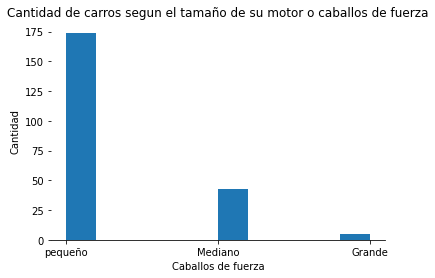

In [44]:
#llamar libreria para grafics matplotlib
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot 
plt.pyplot.hist(dfAutos["horsepowerBins"])# esto crea un histograma

plt.pyplot.xlabel("Caballos de fuerza")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Cantidad de carros segun el tamaño de su motor o caballos de fuerza")

In [45]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,peak,City,Higway,price,City 1/100km,Higway 1/100km,lengthNorm,widthhNorm,heingtNorm,horsepowerBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054,pequeño
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054,pequeño
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254,Mediano
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,30,13950.0,9.791667,7.833333,0.848630,0.919444,0.908027,pequeño
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,22,17450.0,13.055556,10.681818,0.848630,0.922222,0.908027,pequeño


<h2 Style = "color:#98FB98">4. Cargar y estandarizar los set de datos</h2>
</br>
<p> ¿Que hace en esta etapa?</p>
</br>
<li>1. Identificar las preguntas de negocio<li>
<li>2. Dar un formato/agrupar los datos para crear el grafico<li>
<li>3. Dar formato a los graficos   <li>
<li>4. Generacion del reporte escrito <li>
    
</ol>
<h4 style="color: #796EA8">¿Cual Marca de carro tenemos mas en inventario?</h4>    

In [46]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,peak,City,Higway,price,City 1/100km,Higway 1/100km,lengthNorm,widthhNorm,heingtNorm,horsepowerBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054,pequeño
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054,pequeño
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254,Mediano


In [47]:
#Se agrupa y cuenta la cantidad de registros segun la marca
dfGraf = dfAutos.groupby(["make"]).count()
#Se selecciona unicamente el indice de la primera columna
dfGraf = dfGraf.iloc[:,:1]
#Se ordenan los datos de mayor a menor
dfGraf = dfGraf.sort_values("symboling", ascending = False)
#Se muestran los datos para graficar
dfGraf

,symboling
make,
toyota,46
volkswagen,24
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
peugot,11
dodge,9


TypeError: set_ticks() got an unexpected keyword argument 'labels'

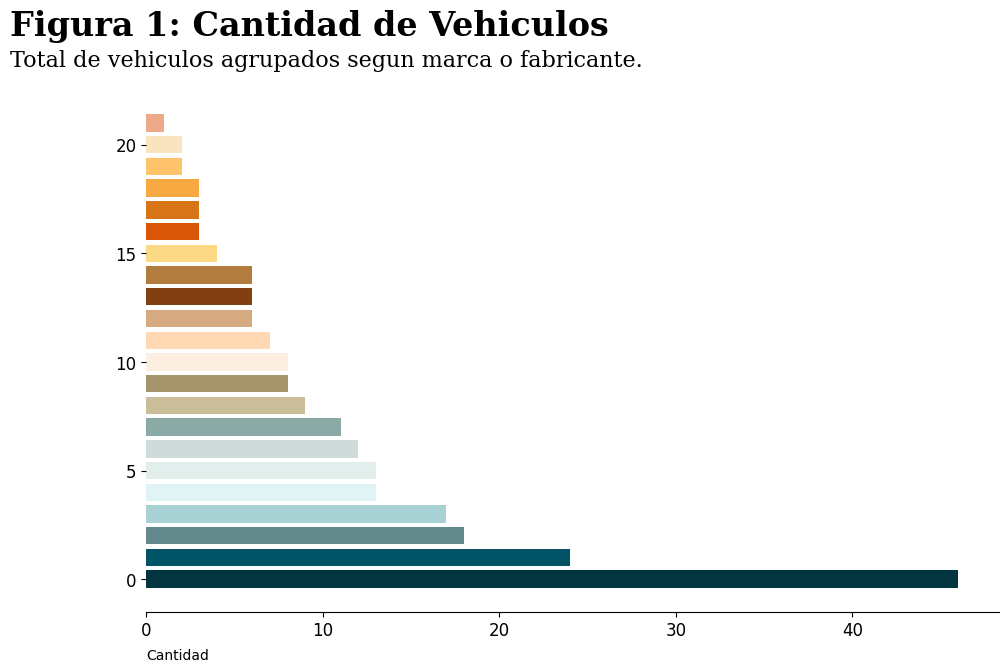

In [49]:

import matplotlib as plt
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(11,6.9),dpi=100)
 
# Datos para crear el grafico
eje_x = dfGraf.index.tolist()
eje_y = dfGraf['symboling'].tolist()
y_pos = np.arange(len(eje_x))
 
#Generacion de colores para el grafico
bar_colors = ["#033540","#015366", "#63898C","#A7D1D2","#E0F4F5", "#E2EEEC", "#CFDBDA","#8AAAA5","#CABD9A","#A5956D",
             "#fceee0", "#fed9b4","#d6aa80","#823f12","#b07d3e","#fcd985","#d95507","#d77418","#f8a841","#fec36b","#F8E4BE","#EEA988",
              "#F4F3EE"]
 
#Creacion del grafico
ax.barh(y_pos, eje_y, align='center', color = bar_colors)
 
#Formato del grafico
#-------Titulo y Subtitulo del grafico
title_t = "Figura 1: Cantidad de Vehiculos"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.001,
             y=0.96,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")
 
subtitle_t = 'Total de vehiculos agrupados segun marca o fabricante.'
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.94,
            transform = fig.transFigure,
            fontsize=16,
            fontweight="regular",
            fontfamily="serif")
 
#-------Etiquetas en Eje X y Y
label = "Cantidad"
ax.set_xlabel(label,
             ha="left",
             fontsize=10,
             fontweight="regular",
             fontfamily="sans")
 
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)
 
ax.tick_params(axis='both',
               labelsize=12)
 
ax.set_yticks(y_pos, labels=eje_x)
ax.invert_yaxis()
plt.subplots_adjust(top=0.80)
 
plt.show()

<h3 style = "color:#20c67a"> ¿Cual es la distribución segun el estilo? </h3>

In [ ]:
#Se agrupa y cuenta la cantidad de registros segun la marca
dfGraf = dfAutos.groupby(["style"]).count()
#Se selecciona unicamente el indice de la primera columna
dfGraf = dfGraf.iloc[:,:1]
#Se ordenan los datos de mayor a menor
dfGraf = dfGraf.sort_values("symboling", ascending = False)
#Se muestran los datos para graficar
dfGraf


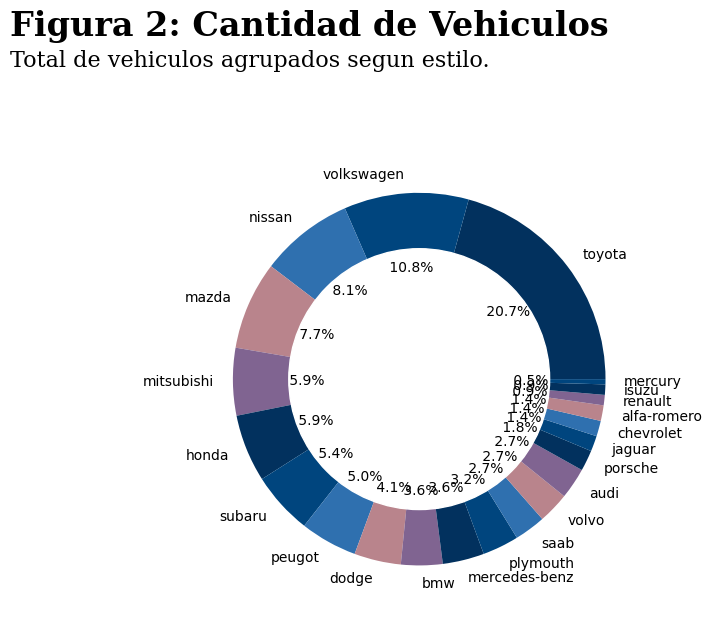

In [50]:
names =dfGraf.index.tolist()
style =dfGraf["symboling"].tolist()

#Esta linea da los tamaños, centra el grafico
fig,ax=plt.subplots(1,1,figsize=(8,6.9),dpi=100)

circulo = plt.Circle((0,0),0.7, color="#FFFFFF")#Este paso dibuja un grafico de anillos,es la base para el grafico de anillos

plt.pie(style,
        labels=names,
        autopct=" %1.1f%% ",
        colors=["#02315E","#00457E","#2F70AF","#B9848C","#806491"])

#Formato del grafico
#-------Titulo y Subtitulo del grafico
title_t = "Figura 2: Cantidad de Vehiculos"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.001,
             y=0.96,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")
 
subtitle_t = 'Total de vehiculos agrupados segun estilo.'
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.94,
            transform = fig.transFigure,
            fontsize=16,
            fontweight="regular",
            fontfamily="serif")

plt.subplots_adjust(top=0.80)

#Para poner un grafico sobre otra figura
p=plt.gcf()
p.gca().add_artist(circulo)
plt.show()


<h3 style = "color:#20c67a"> ¿Cuantos autos existen en inventario segun la cantidad de cilindros? </h3>

In [51]:
#Se agrupa y cuenta la cantidad de registros segun la marca
dfGraf = dfAutos.groupby(["Cylinders"]).count()
#Se selecciona unicamente el indice de la primera columna
dfGraf = dfGraf.iloc[:,:1]
#Se ordenan los datos de mayor a menor
dfGraf = dfGraf.sort_values("symboling", ascending = False)
#Se muestran los datos para graficar
dfGraf


,symboling
Cylinders,
four,175
six,26
five,11
eight,4
two,4
three,1
twelve,1


<BarContainer object of 7 artists>

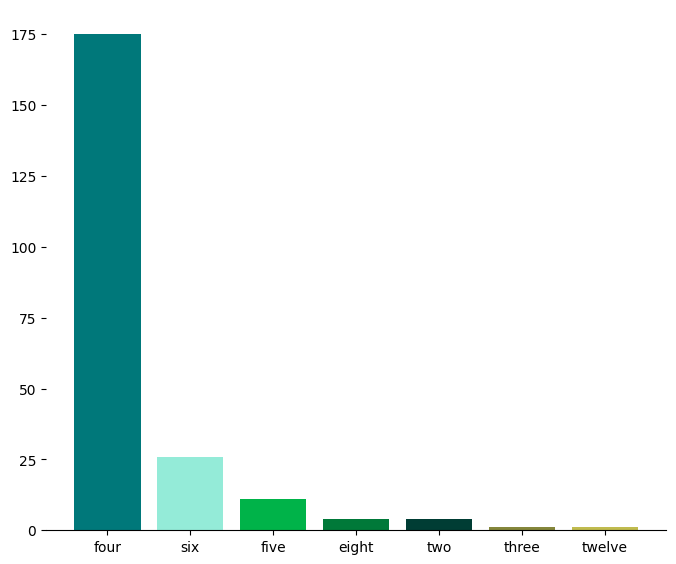

In [52]:
fig,ax=plt.subplots(1,1,figsize=(8,6.9),dpi=100)

Cylinders =dfGraf.index.tolist()
counts =dfGraf["symboling"].tolist()

bar_colors= ["#00787a", "#94ebd8","#00b349", "#007939", "#003d34", "#84863b", "#c0bb4e"]

ax.bar(Cylinders, counts, label=Cylinders, color=bar_colors)


<h3 style = "color:#9C4A1A"> ¿Existe alguna relación entre el estilo del auto y el precio?

In [53]:
dfAutos[['price']] = dfAutos[['price']].astype("float") #este codigo cambia el valor de un cambio de obj a int
dfAutos.dtypes

symboling            int64
normalized           int32
make                object
fuel                object
aspiration          object
doors               object
style               object
wheels              object
engine              object
base               float64
length             float64
width              float64
heingt             float64
curb                 int64
engineType          object
Cylinders           object
engineSize           int64
system              object
bore               float64
stroke             float64
compression        float64
horsepower           int32
peak               float64
City                 int64
Higway               int64
price              float64
City 1/100km       float64
Higway 1/100km     float64
lengthNorm         float64
widthhNorm         float64
heingtNorm         float64
horsepowerBins    category
dtype: object

In [54]:
#Se agrupa y cuenta la cantidad de registros segun la marca
dfGraf = dfAutos.groupby(["style","price"]).count()
#Se selecciona unicamente el indice de la primera columna
dfGraf = dfGraf.iloc[:,:1]

#Se ordenan los datos de mayor a menor
dfGraf = dfGraf.sort_values("symboling", ascending = False)

#Se muestran los datos para graficar
dfGraf


symboling
style       price             
sedan       7775.0           3
            8495.0           3
convertible 11595.0          2
sedan       12940.0          2
hatchback   9988.0           2
...                        ...
            14869.0          1
            15040.0          1
            15645.0          1
            16500.0          1
wagon       28248.0          1

[183 rows x 1 columns]

In [55]:
bPrice= np.linspace(min(dfAutos["price"]),max(dfAutos["price"]), 4) #este codigo me muestra los valores minimos y maximos en dfAutos para la variable price
bPrice

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [56]:
groupPrice = ["Bajo", "Medio", "Alto"]

# este codigo le dice a python que cree una nueva variable priceBins donde de la libreria pandas corte 
#el documento dfAutos en secciones. las que se definen en el la variable bPrice y las reacomode segun la variable groupPrice
#ademas se le solicita que incluya el valor mas bajo de cada una de las categorias con el include _lowest=True

dfAutos["priceBins"] = pd.cut(dfAutos["price"],bPrice, labels= groupPrice, include_lowest= True)
dfAutos[["price", "priceBins"]].head(5)

,price,priceBins
0,13495.0,Bajo
1,16500.0,Bajo
2,16500.0,Bajo
3,13950.0,Bajo
4,17450.0,Bajo


In [57]:
dfAutos["priceBins"].value_counts() # Para saber el total de datos de cada categoria


Bajo     197
Medio     13
Alto      12
Name: priceBins, dtype: int64

In [58]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,City,Higway,price,City 1/100km,Higway 1/100km,lengthNorm,widthhNorm,heingtNorm,horsepowerBins,priceBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054,pequeño,Bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054,pequeño,Bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254,Mediano,Bajo


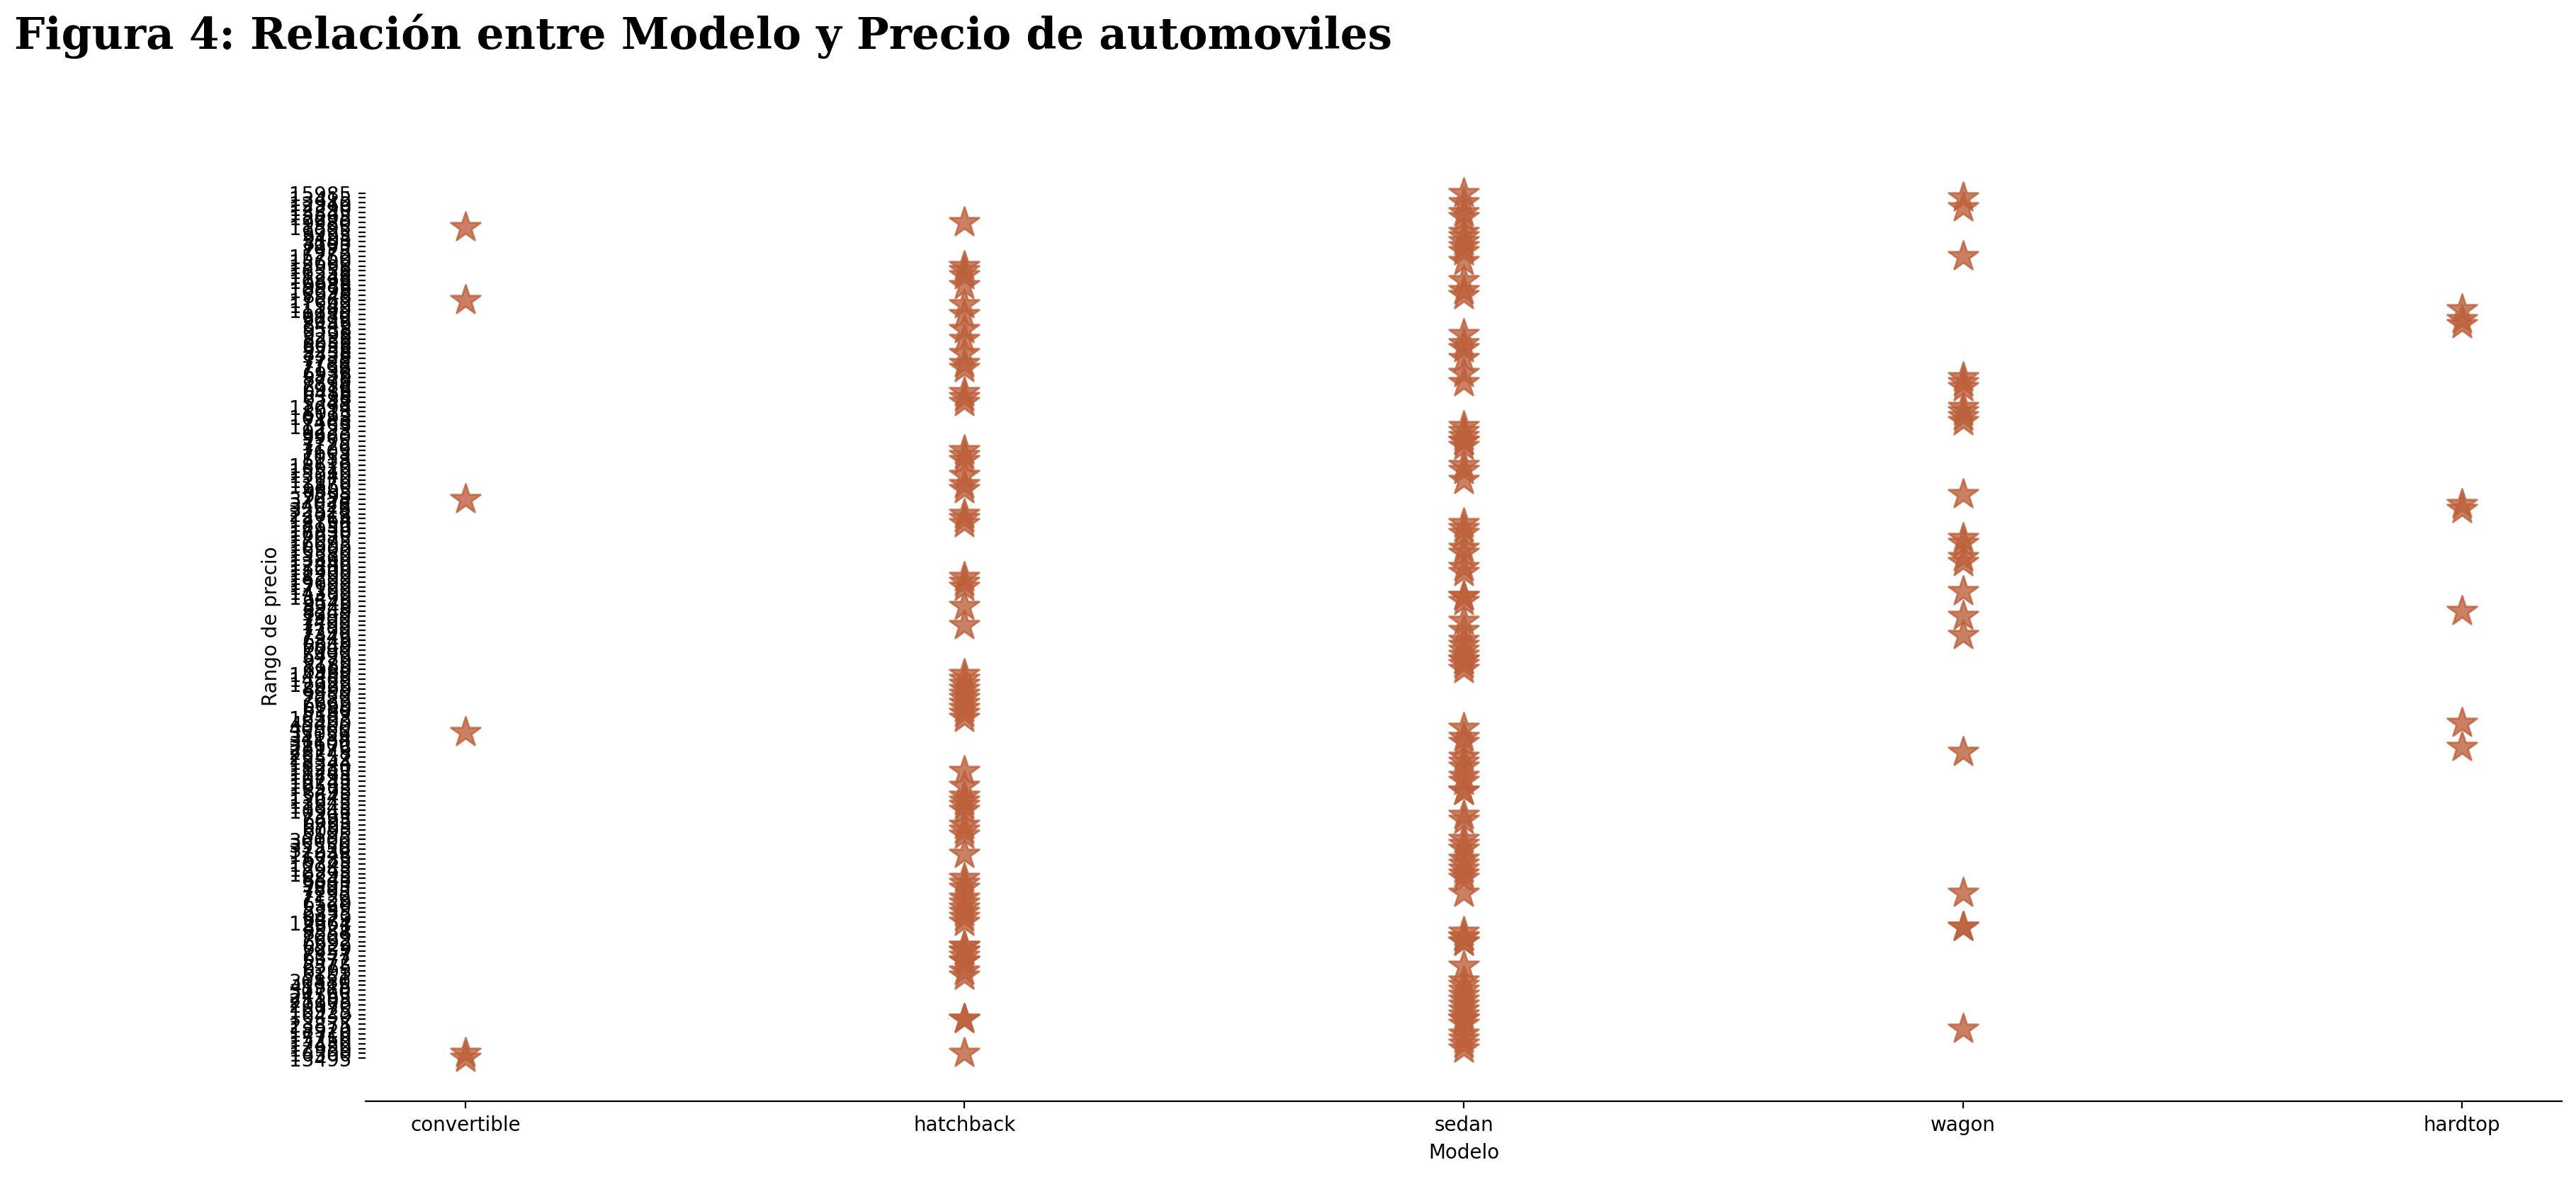

In [60]:
import matplotlib as plt
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,8.9),dpi=200)

plt.scatter(df_1er_set["style"],df_1er_set["price"], c="#BD613C", s=250, alpha=0.8, marker="*", label="luck")
plt.xlabel("Modelo")
plt.ylabel("Rango de precio")
plt.title ="Figura 4: Relación entre Modelo y Precio de automoviles"

ax.set_title(plt.title,
             horizontalalignment = 'left',
             x=0.001,
             y=0.96,
             transform=fig.transFigure,
             fontsize=22,
             fontweight="bold",
             fontfamily="serif")
plt.show()